In [1]:
import matplotlib.pyplot as plt

from scipy.stats import lognorm

from astropy.io import ascii
import numpy as np
import astropy.units as u
import pandas as pd
from astropy.time import Time
from astropy.visualization import hist

from minicyclop.io import read_latest, read_seeing_data

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
d = read_latest("/home/tim/MMT/minicyclop/data/MiniCyclop/Data/Last_Seeing_Data.txt")

In [3]:
d['obstime'] - Time.now()

<TimeDelta object: scale='tai' format='jd' value=-0.28609886497661524>

In [4]:
filename = "/home/tim/MMT/minicyclop/data/MiniCyclop/Data/Seeing_Data.txt"
dt = ascii.read(filename, delimiter='|', names=['UT', 'MST', 'JD', 'flux', 'seeing', 'r0'])

In [5]:
ut = Time(dt['JD'], scale='utc', format='jd')
ut.isot

array(['2022-06-08T03:32:32.968', '2022-06-08T03:33:27.409',
       '2022-06-08T03:34:23.655', ..., '2022-06-23T11:54:24.595',
       '2022-06-23T11:55:15.010', '2022-06-23T11:56:04.620'], dtype='<U23')

In [6]:
df = read_seeing_data("/home/tim/MMT/minicyclop/data/MiniCyclop/Data/Seeing_Data.txt")

In [7]:
df

,flux,seeing,r0,isot
UT,,,,
6/8/2022 3:32:32 AM,2733.7,0.84,135.8,2022-06-08T03:32:32.968
6/8/2022 3:33:27 AM,2755.7,0.84,134.4,2022-06-08T03:33:27.409
6/8/2022 3:34:23 AM,2801.6,2.38,47.7,2022-06-08T03:34:23.655
6/8/2022 3:35:16 AM,2853.2,1.01,112.3,2022-06-08T03:35:16.325
6/8/2022 3:36:00 AM,2739.0,1.03,110.7,2022-06-08T03:36:00.691
...,...,...,...,...
6/23/2022 11:52:45 AM,1923.7,1.46,77.7,2022-06-23T11:52:45.451
6/23/2022 11:53:34 AM,1940.5,1.45,78.4,2022-06-23T11:53:34.898
6/23/2022 11:54:24 AM,1939.8,1.46,77.8,2022-06-23T11:54:24.595


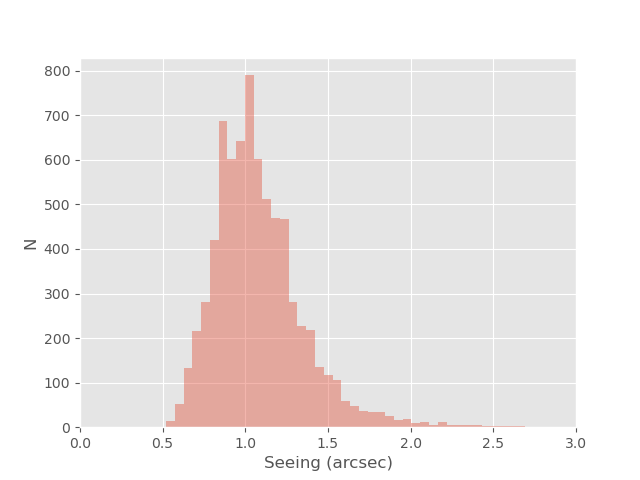

In [8]:
fig = plt.figure()
with plt.style.context('ggplot'):
    hist(df['seeing'], bins='scott', histtype='stepfilled', alpha=0.4)
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
    plt.xlim([0.0, 3.0])
plt.show()

In [9]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(df['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(df['seeing'])
fit_median = exp_mu + loc

0.3568432263560284 0.3381021929000561 0.7014538384222266


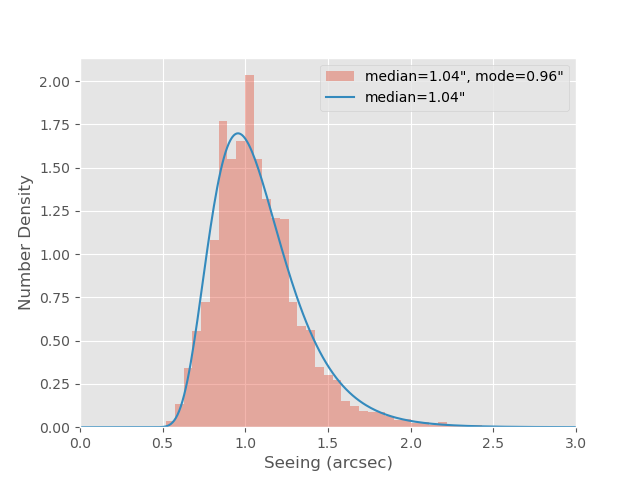

In [10]:
fig = plt.figure()
with plt.style.context('ggplot'):
    hist(df['seeing'], bins='scott', histtype='stepfilled', alpha=0.4, density=True)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.xlim([0.0, 3.0])
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
plt.show()